Давайте дадим теоретическое объяснение кода и задействованных концепций:

1. **Представление вычислительной системы:** Код представляет собой вычислительную систему, использующую ориентированный граф **(DiGraph)** в **NetworkX**. На этом графике каждый узел представляет собой компонент вычислительной системы, такой как **ЦП**, **ОЗУ**, **хранилище** и **устройство ввода-вывода**. Ребра графа представляют связи или зависимости между этими компонентами.

2. **Меры безопасности:** Вычислительная система также включает две меры безопасности: **«Брандмауэр»** и **«Антивирус»**. Эти меры безопасности представлены в виде дополнительных узлов в графе и связаны с компонентами, которые они должны защищать. Включив меры безопасности как часть графика, мы можем визуально представить, как компоненты безопасности связаны с основными компонентами системы.

3. **Отображение графика вычислительной системы:** Функция **display_computing_system_graph()** использует библиотеку **matplotlib** для построения графа вычислительной системы. Каждый узел на графике имеет определенный цвет и форму, чтобы визуально отличать различные компоненты и меры безопасности. Направленные ребра между узлами представлены на графике в виде линий. Эта визуализация позволяет нам понять взаимосвязи между различными компонентами и мерами безопасности в вычислительной системе.

4. **Оценка надежности системы:** Надежность вычислительной системы — это вероятность того, что она правильно функционирует (**выживает**) в нормальных условиях эксплуатации, даже при наличии отказов компонентов. Вычисление точной надежности системы для произвольных графов невозможно с вычислительной точки зрения из-за сложности проблемы.

5. **Моделирование Монте-Карло:** Для оценки надежности системы код использует моделирование Монте-Карло, статистический метод, основанный на случайной выборке. При каждом запуске моделирования для вычислительной системы генерируется случайный сценарий отказа. В этом сценарии каждому узлу присваивается случайное логическое значение (**True** или **False**), указывающее, вышел ли компонент из строя или нет.

6. **Оценка надежности системы:** Для каждого запуска моделирования код проверяет, выживает ли система, проверяя, есть ли какие-либо неисправные узлы в графе надежности (неориентированная версия исходного графа). Если все узлы выживают (нет отказавших узлов), считается, что система выжила в этом конкретном запуске моделирования. Запустив несколько симуляций (по умолчанию в коде **10 000** запусков), код оценивает вероятность выживания системы, что приблизительно соответствует надежности системы.

7. **График расчетной надежности системы:** Чтобы наблюдать, как расчетная надежность системы изменяется в зависимости от количества запусков симуляции (количества выборок), код создает график, на котором количество выборок отображается по оси **X**, а предполагаемая надежность системы — по оси **Y**. На этом графике показано, как оценка надежности сходится с истинным значением надежности системы по мере увеличения количества выборок.

Таким образом, код обеспечивает визуальное представление вычислительной системы с мерами безопасности с использованием ориентированного графа. Затем он использует моделирование методом **Монте-Карло** для оценки надежности системы, что позволяет нам аппроксимировать вероятность правильной работы системы в условиях отказа. График расчетной надежности системы в зависимости от количества выборок показывает, как оценка улучшается при большем количестве запусков моделирования.

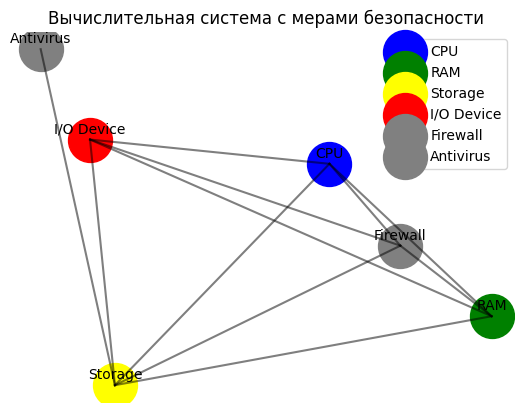

Расчетная надежность системы: 0.0128


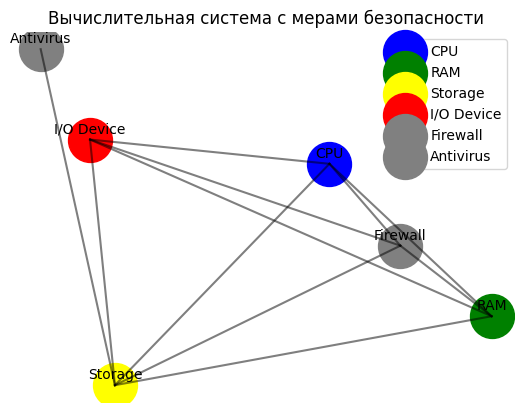

Расчетная надежность системы: 0.0139


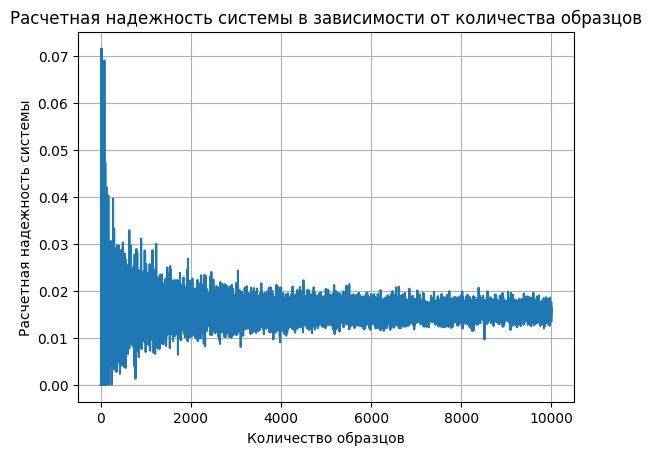

In [2]:
def plot_system_reliability_graph(graph, max_num_samples=10000):
    num_samples_range = list(range(1, max_num_samples + 1))
    reliability_values = []

    for num_samples in num_samples_range:
        system_reliability = monte_carlo_simulation(graph, num_samples)
        reliability_values.append(system_reliability)

    # Plot the graph
    plt.plot(num_samples_range, reliability_values)
    plt.xlabel('Количество образцов')
    plt.ylabel('Расчетная надежность системы')
    plt.title('Расчетная надежность системы в зависимости от количества образцов')
    plt.grid(True)
    plt.show()

import networkx as nx
import matplotlib.pyplot as plt
import random

def build_computing_system_graph():
    # Создать пустой график
    G = nx.DiGraph()

    # Добавьте узлы для ЦП, ОЗУ, хранилища и устройств ввода-вывода.
    G.add_node("CPU", color="blue")
    G.add_node("RAM", color="green")
    G.add_node("Storage", color="yellow")
    G.add_node("I/O Device", color="red")

    # Добавьте узлы для мер безопасности
    G.add_node("Firewall", color="gray")
    G.add_node("Antivirus", color="gray")

    # Добавьте ребра для представления соединений между компонентами
    G.add_edge("CPU", "RAM")
    G.add_edge("CPU", "Storage")
    G.add_edge("CPU", "I/O Device")
    G.add_edge("RAM", "Storage")
    G.add_edge("RAM", "I/O Device")
    G.add_edge("Storage", "I/O Device")

    # Добавьте ребра для представления мер безопасности
    G.add_edge("Firewall", "CPU")
    G.add_edge("Firewall", "RAM")
    G.add_edge("Firewall", "Storage")
    G.add_edge("Firewall", "I/O Device")
    G.add_edge("Antivirus", "Storage")

    return G

def display_computing_system_graph(graph):
    # Получить цвета и формы узлов
    node_colors = {node: graph.nodes[node]['color'] for node in graph.nodes}
    node_shapes = {node: graph.nodes[node]['shape'] if 'shape' in graph.nodes[node] else 'o' for node in graph.nodes}

    # Нарисуйте график
    pos = nx.spring_layout(graph, seed=42)
    for node in graph.nodes:
        shape = node_shapes[node]
        color = node_colors[node]
        x, y = pos[node]
        plt.scatter(x, y, c=color, s=1000, marker=shape, label=node)

    # Рисовать ребра
    for edge in graph.edges:
        x_start, y_start = pos[edge[0]]
        x_end, y_end = pos[edge[1]]
        plt.plot([x_start, x_end], [y_start, y_end], color='black', alpha=0.5)

    # Нарисовать метки
    for node, (x, y) in pos.items():
        plt.text(x, y + 0.05, node, ha='center', va='center')

    # Показать сюжет
    plt.title("Вычислительная система с мерами безопасности")
    plt.axis('off')
    plt.legend()
    plt.show()

def monte_carlo_simulation(graph, num_samples=10000):
    # Создайте граф надежности путем преобразования графа вычислительной системы в неориентированный граф.
    reliability_graph = graph.to_undirected()

    # Количество успешных запусков системы
    successful_runs = 0

    for _ in range(num_samples):
        # Генерация случайного сценария сбоя
        failure_scenario = {node: random.random() > 0.5 for node in graph.nodes}

        # Проверьте, выживает ли система (нет сбойных ребер)
        if all(not failure_scenario[node] for node in reliability_graph.nodes):
            successful_runs += 1

    # Рассчитать надежность системы (вероятность выживания)
    system_reliability = successful_runs / num_samples
    return system_reliability

if __name__ == "__main__":
    computing_system_graph = build_computing_system_graph()
    display_computing_system_graph(computing_system_graph)

    # Выполните моделирование методом Монте-Карло, чтобы оценить надежность системы.
    system_reliability = monte_carlo_simulation(computing_system_graph)
    print(f"Расчетная надежность системы: {system_reliability:.4f}")

if __name__ == "__main__":
    computing_system_graph = build_computing_system_graph()
    display_computing_system_graph(computing_system_graph)

    # Выполните моделирование методом Монте-Карло, чтобы оценить надежность системы.
    system_reliability = monte_carlo_simulation(computing_system_graph)
    print(f"Расчетная надежность системы: {system_reliability:.4f}")

    # Постройте график предполагаемой надежности системы в зависимости от количества выборок
    plot_system_reliability_graph(computing_system_graph)
